> **Họ và tên**: Đoàn Đặng Phương Nam <br> 
> **Lớp**: 22CLC02 <br>
> **MSSV**: 22127280 <br>
> **Môn học**: Toán ứng dụng và thống kê

<center>

### **ĐỒ ÁN LINEAR REGRESSION**

</center>

**Nội dung đồ án**

File **"wine.csv"** là cơ sở dữ liệu đánh giá chất lượng của 1200 chai rượu vang theo thang điểm 1 - 10 dựa trên 11 tính chất khác nhau.

**Xây dựng mô hình đánh giá chất lượng rượu sử dụng phương pháp hồi quy tuyến tính.**

$\quad$ *a. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp.*

$\quad$ *b. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất.*

$\quad$ *c. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất.*

**Quy định bài nộp**
+ Thực hiện toàn bộ bài làm trên 1 tập tin Jupyter Notebook (.ipynb) hoặc Python (.py)

+ File bài nộp chứa các tập tin sau: 

$\quad$ $\quad$ 1. Báo cáo toàn bộ bài làm: MSSV.pdf <br>
$\quad$ $\quad$ 2. Mã nguồn: MSSV.ipynb hoặc MSSV.py

+ Trong đó, nội dung tập tin báo cáo gồm có:
    + Thông tin cá nhân: họ và tên, MSSV
    + Liệt kê các chức năng đã hoàn thành
    + Ý tưởng thực hiện, mô tả các hàm chức năng
    + Hình ảnh kết quả với từng chức năng

## **1. Import những thư viện cần thiết**

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

## **2. Đọc dữ liệu**

In [4]:
# Read data from wine.csv file
data = pd.read_csv("wine.csv", sep = ";")

In [5]:
# Review the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1199 non-null   float64
 1   volatile acidity      1199 non-null   float64
 2   citric acid           1199 non-null   float64
 3   residual sugar        1199 non-null   float64
 4   chlorides             1199 non-null   float64
 5   free sulfur dioxide   1199 non-null   float64
 6   total sulfur dioxide  1199 non-null   int64  
 7   density               1199 non-null   float64
 8   pH                    1199 non-null   float64
 9   sulphates             1199 non-null   float64
 10  alcohol               1199 non-null   float64
 11  quality               1199 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 112.5 KB


In [9]:
# Clean the data and split it into two parts: features and label
numSamples, numFeatures = data.shape
cleanedData = [list(data.iloc[i]) for i in range (numSamples)]

features = [[cleanedData[i][j] for j in range (numFeatures - 1)] for i in range (numSamples)]
labels = [cleanedData[i][numFeatures - 1] for i in range (numSamples)]

## **3. Xây dựng những hàm hỗ trợ**

In [6]:
# Support functions
def checkMatrix (matrix: list[list[float]]) -> bool:
    """
    The function checks if the length of all rows are similar
    """
    length = len(matrix[0])
    
    for i in range (1, len(matrix)):
        if (len(matrix[i]) != length):
            return False
        
    return True

def transposeMatrix (matrix: list[list[float]]) -> list[list[float]]:
    """
    This function is created to transpose a matrix
    """
    if not checkMatrix(matrix):
        raise Exception ("In the transposeMatrix function, check the inputted matrix again")
    
    return [[matrix[i][j] for i in range (len(matrix))] for j in range (len(matrix[0]))]

def L2_Norm (vector: list[float]) -> float:
    """
    This function calculates the Euclidean norm of a vector
    """
    def innerProduct (vector1: list[float], vector2: list[float]) -> float:
        """
        This function calculates the inner product (will be simply comprehended as dot product) between two vectors
        """
        return sum([vector1[i] * vector2[i] for i in range (len(vector1))])
    
    return (innerProduct(vector, vector)) ** 0.5

def multiplyTwoMatrices (matrix1: list[list[float]], matrix2: list[list[float]]):
    """
    This function calculates the multiplication of two matrices
    """
    if (not checkMatrix(matrix1) or not checkMatrix(matrix2)):
        raise Exception ("In the multiplyTwoMatrices function, check your two inputted matrices again")
    
    if (len(matrix1[0]) != len(matrix2)):
        raise Exception ("The number of columns in the first matrix is different from the number of rows in the second matrix")
    
    return [[sum([matrix1[i][k] * matrix2[k][j] for k in range (len(matrix1[0]))]) for j in range (len(matrix2[0]))] 
            for i in range (len(matrix1))]    
    
def addTwoMatrices (matrix1: list[list[float]], matrix2: list[list[float]]):
    """
    This function helps to return the sum of two matrices
    """
    def addTwoVectors (vector1: list[float], vector2: list[float]):
        """
        This function is created to add a vector to another vector
        """
        return [element1 + element2 for element1, element2 in zip(vector1, vector2)]
    
    if (not checkMatrix(matrix1) or not checkMatrix(matrix2)):
        raise Exception ("In the addTwoMatrices function, check your two inputted matrices again")
    
    if (len(matrix1) != len(matrix2) or len(matrix1[0]) != len(matrix2[0])):
        raise Exception ("Two matrices must have the similar shape before adding")
    
    return [addTwoVectors(matrix1[i], matrix2[i]) for i in range (len(matrix1))]

def multiplyMatrixByScalar (matrix: list[list[float]], scalar: float):
    """
    This function helps to multiply a matrix by a scalar
    """
    def multiplyVectorByScalar (vector: list[float], scalar: float) -> list[float]:
        """
        This function is created to multiply a vector by scalar
        """
        return [element * scalar for element in vector]
    
    if not checkMatrix(matrix):
        raise Exception ("In the multiplyMatrixByScalar function, check your inputted matrix again")
    
    return [multiplyVectorByScalar(matrix[i], scalar) for i in range (len(matrix))]

In [7]:
def Inverse (squareMatrix: list[list[float]]):
    """
    This function simulates finding the inverse matrix of a square matrix
    """
    def identityMatrix (size: int):
        """
        This function helps to create an identity matrix, given a size
        """
        return [[int(j == i) for j in range (size)] for i in range (size)]

    def multiplyVectorByScalar (vector: list[float], scalar: float):
        """
        This function is created to multiply a vector by scalar
        """
        return [element * scalar for element in vector]

    def addTwoVectors (vector1: list[float], vector2: list[float]):
        """
        This function is created to add a vector to another vector
        """
        return [element1 + element2 for element1, element2 in zip(vector1, vector2)]

    def swapTwoRows (matrix: list[list[float]], index1: int, index2: int):
        """
        This function is created to swap two rows in a certain matrix
        """
        matrix[index1], matrix[index2] = matrix[index2], matrix[index1]
        
    #! Check the input
    if not checkMatrix(squareMatrix):
        raise Exception ("In the Inverse function, check the inputted matrix again")
    
    if (len(squareMatrix) != len(squareMatrix[0])):
        raise Exception ("In the Inverse function, the inputted matrix should be a square matrix")
        
    size = len(squareMatrix)
    
    #! Get the augmented matrix by combining the original square matrix and an identity matrix with the same size
    squareMatrix_copy = [[squareMatrix[i][j] for j in range (size)] for i in range (size)]
    identity_matrix = identityMatrix(size)
    
    augmentedMatrix = [element1 + element2 for element1, element2 in zip(squareMatrix_copy, identity_matrix)]
    
    #! Use the idea of Gauss-Jordan elimination to find the inverse matrix
    for i in range (0, size):
        #? From the current row, if all of values in the column are 0, we can conclude that the matrix is non-invertible
        if (all(augmentedMatrix[row][i] == 0 for row in range (i, size))):
            return None
        
        #? In the current column, choose the first row satisfying that the value at the position is different from 0
        pivotRow = i + [augmentedMatrix[row][i] != 0 for row in range (i, size)].index(True)
        swapTwoRows(augmentedMatrix, i, pivotRow)
        
        #? Convert the value at the current row and column into 1
        augmentedMatrix[i] = multiplyVectorByScalar(augmentedMatrix[i], 1 / augmentedMatrix[i][i])
        
        #? For each remaining row, add a appropriate scalar of the current row satisfying that the value in the current column is 0
        for j in range (0, size):
            if (j != i): #? Need not to update the current row
                augmentedMatrix[j] = addTwoVectors(augmentedMatrix[j], 
                                                multiplyVectorByScalar(augmentedMatrix[i], -augmentedMatrix[j][i]))
            
    return [[augmentedMatrix[i][j] for j in range (size, 2 * size)] for i in range (size)]

## **4. Xây dựng mô hình sử dụng toàn bộ 11 đặc trưng đề bài cung cấp**

In [7]:
def model_build_full_features (features: list[list[float]], labels: list[float]):
    """
    Input: The feature data and the corresponding label
    Output: The parameter (b1, b2, ..., bk) for the best fitting of the model y = b1x1 + ... + bkxk with the feature data 
    of k columns
    """
    if not checkMatrix(features):
        raise Exception ("In the model_build_full_features function, check the feature data matrix again")
    
    if (len(features) != len(labels)):
        raise Exception ("In the model_build_full_features function, the number of labels is different from the number of samples")
    
    X = [[1] + features[i] for i in range (len(features))]
    y = transposeMatrix([labels])
    
    parameters = multiplyTwoMatrices(Inverse(multiplyTwoMatrices(transposeMatrix(X), X)), multiplyTwoMatrices(transposeMatrix(X), y))
    
    errorVector = addTwoMatrices(y, multiplyMatrixByScalar(multiplyTwoMatrices(X, parameters), -1))
    RSS = L2_Norm([errorVector[i][0] for i in range (len(errorVector))]) ** 2
    
    return [parameters[i][0] for i in range (len(parameters))], RSS, multiplyTwoMatrices(X, parameters)

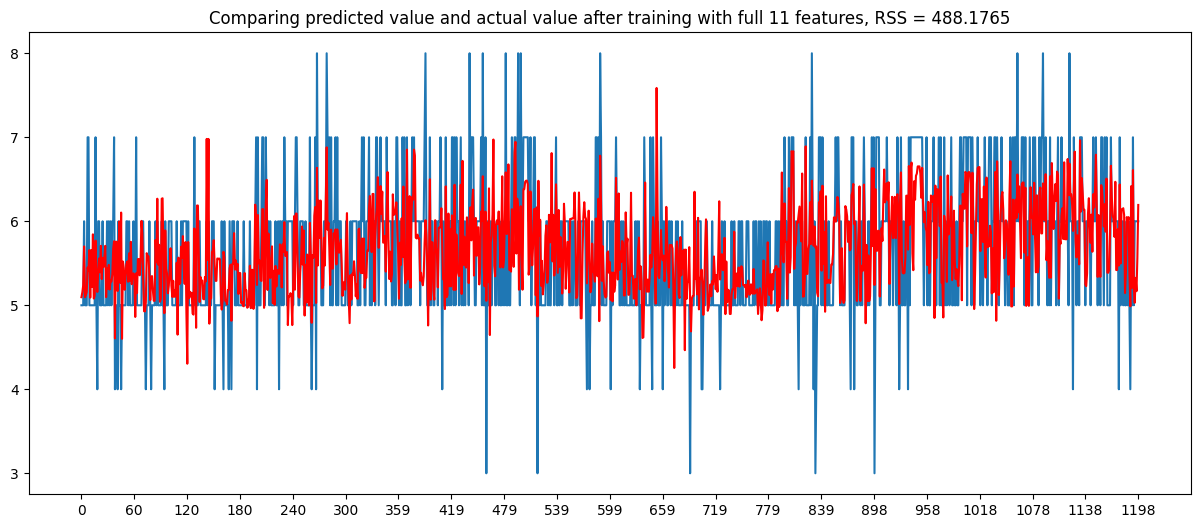

In [9]:
parameters, RSS, y_predicted = model_build_full_features(features, labels)

plt.figure(figsize = (15,6))

x = [i for i in range (len(features))]

minValue = min(x)
maxValue = max(x)

plt.plot(x, labels)
plt.plot(x, y_predicted, color = 'red')
plt.xticks([minValue + i * (maxValue - minValue) / 20 for i in range (21)])

plt.title(f"Comparing predicted value and actual value after training with full 11 features, RSS = {round(RSS, 4)}");

## **5. Xây dựng mô hình sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất**

In [10]:
def model_build_each_feature (features: list[list[float]], labels: list[float]):
    """
    Input: The feature data and the corresponding label
    Output: With the ith feature, return the tuple of two parameters (ai, bi) for the linear model: y = ai + bi*xi, besides its RSS value
    """
    if not checkMatrix(features):
        raise Exception ("In the model_build_each_feature function, check the feature data matrix again")
    
    if (len(features) != len(labels)):
        raise Exception ("In the model_build_each_feature function, the number of labels is different from the number of samples")
    
    listTupleParameters = []
    listRSSValues = []
    
    numFeatures = len(features[0])
    y = transposeMatrix([labels])
    
    for j in range (numFeatures):
        X = [[1] + [features[i][j]] for i in range (len(features))]
        
        parameters = multiplyTwoMatrices(Inverse(multiplyTwoMatrices(transposeMatrix(X), X)), multiplyTwoMatrices(transposeMatrix(X), y))
        listTupleParameters.append(tuple([parameters[i][0] for i in range (len(parameters))]))
        
        errorVector = addTwoMatrices(y, multiplyMatrixByScalar(multiplyTwoMatrices(X, parameters), -1))
        listRSSValues.append(L2_Norm([errorVector[i][0] for i in range (len(errorVector))]) ** 2)
        
    return listTupleParameters, listRSSValues

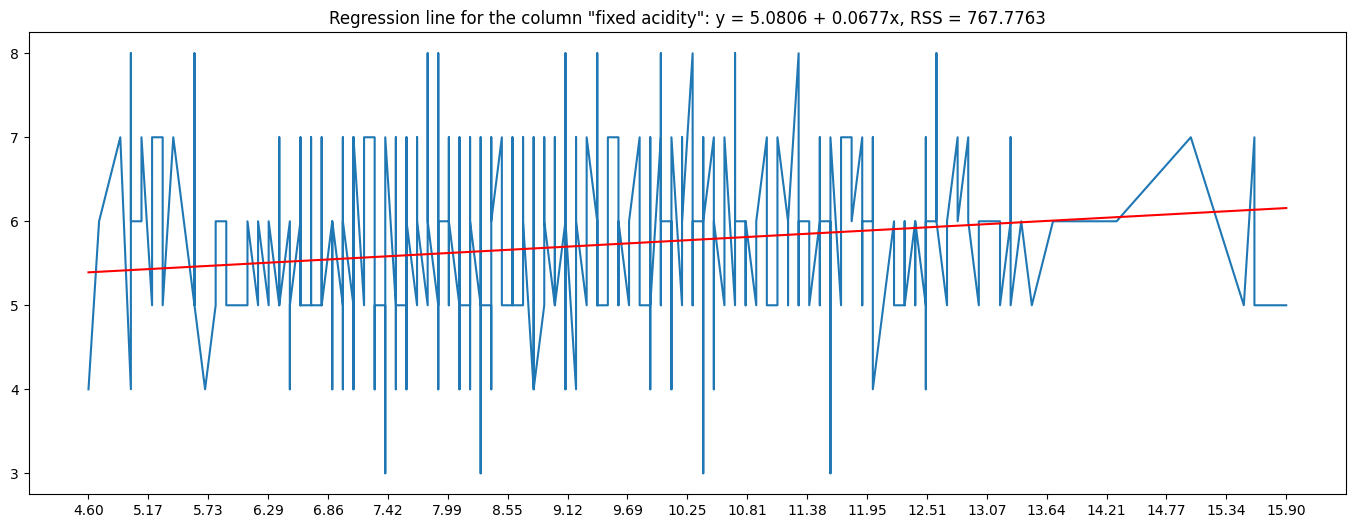

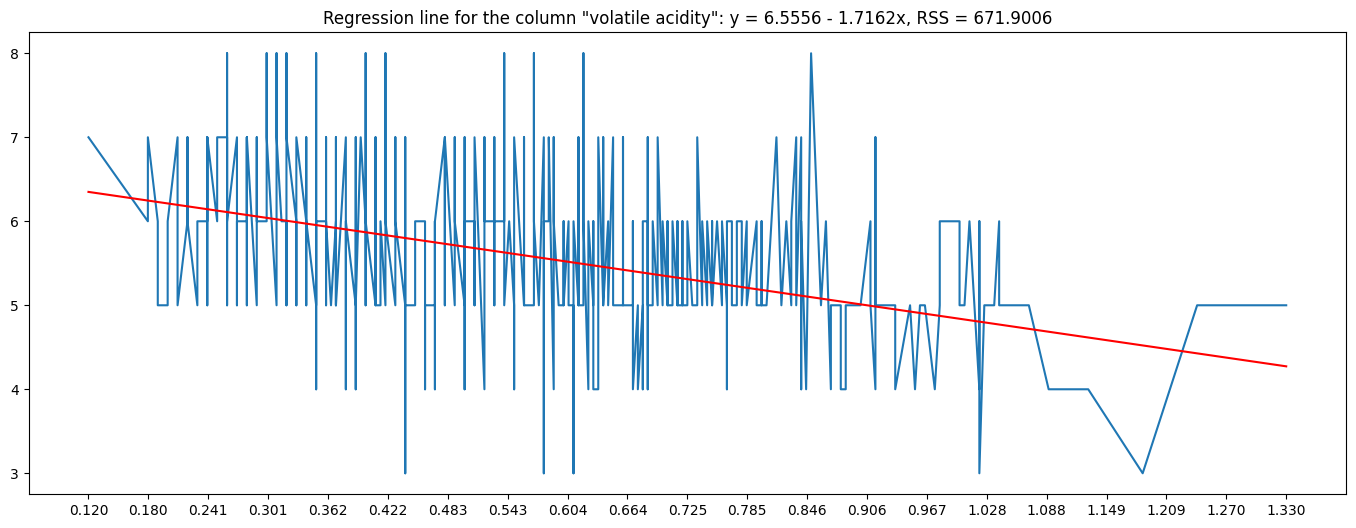

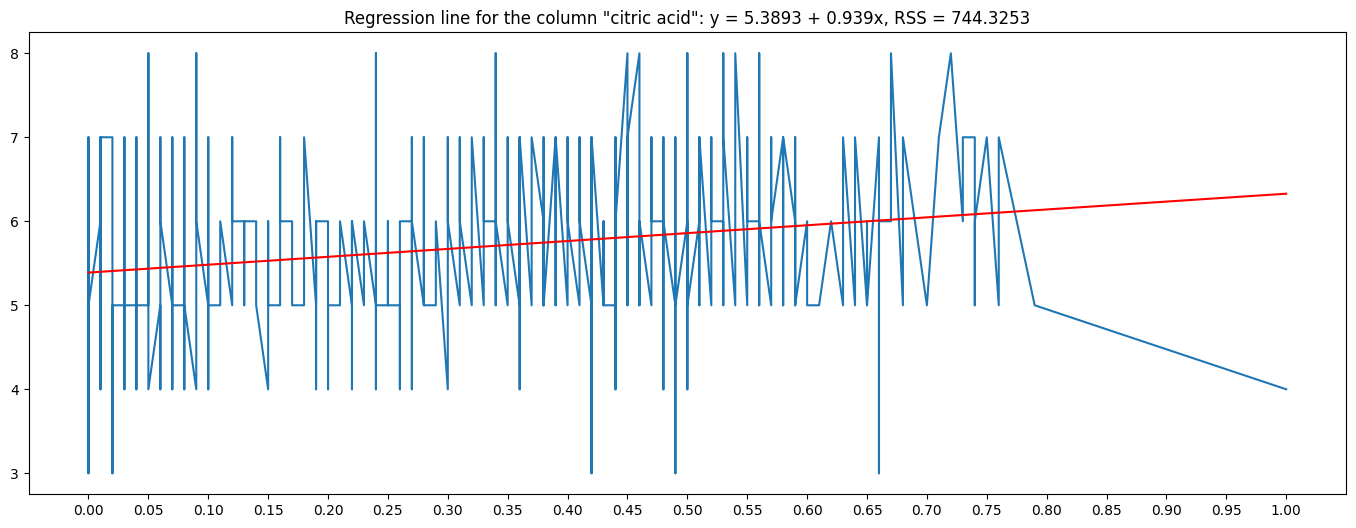

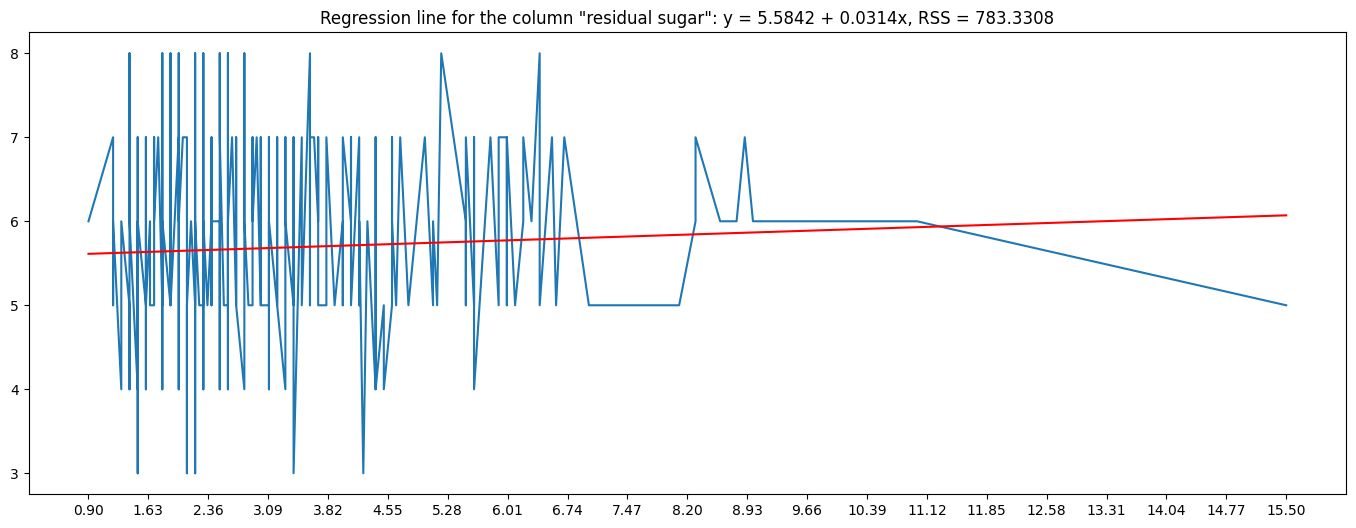

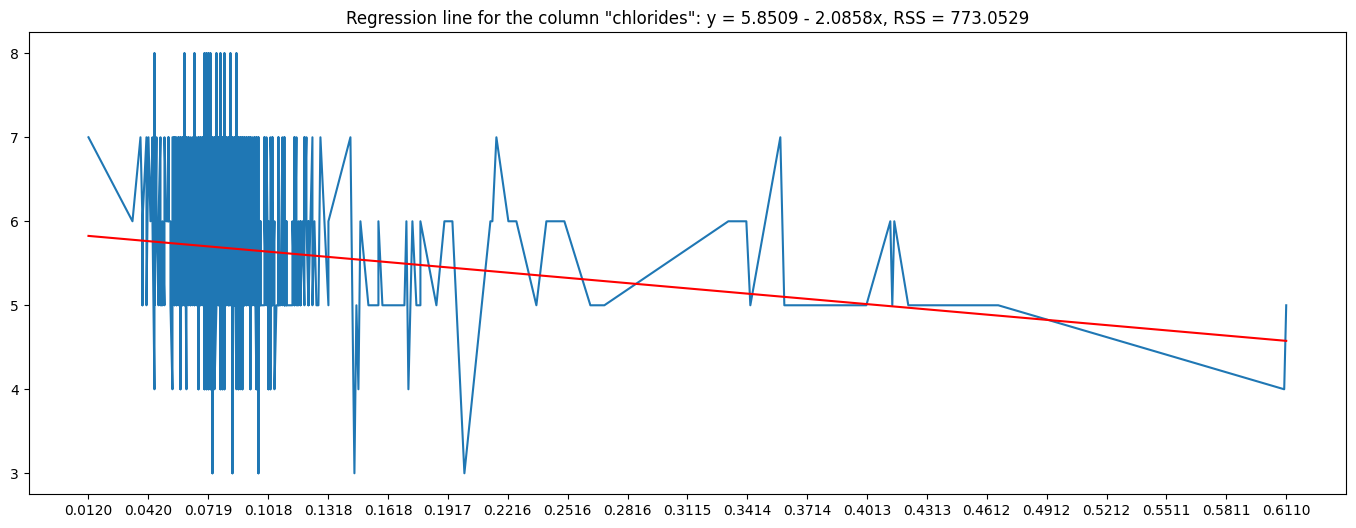

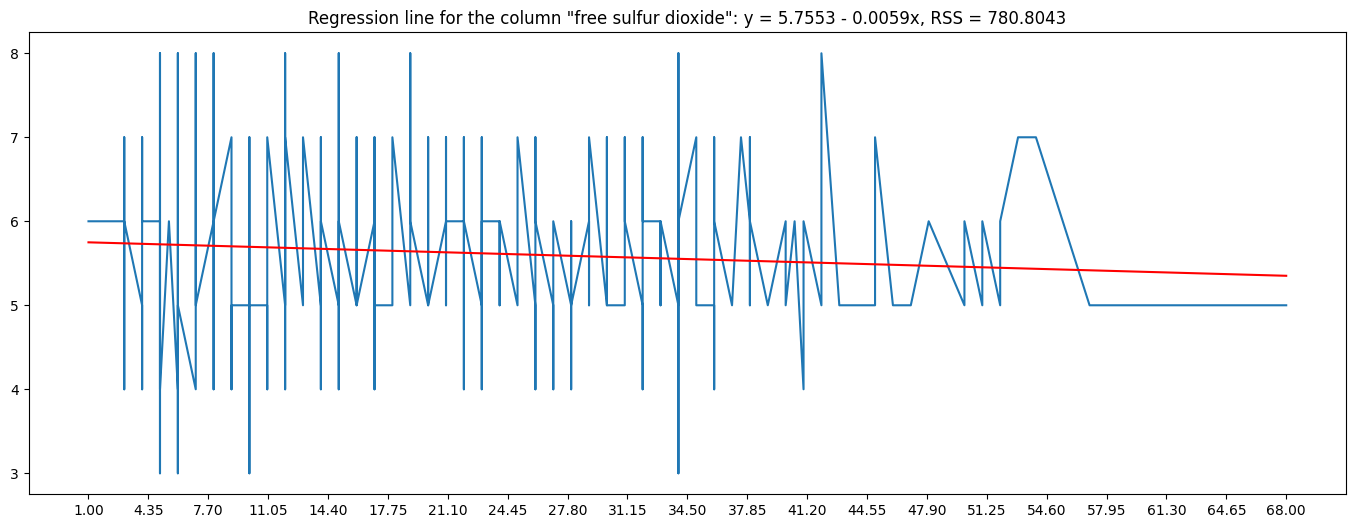

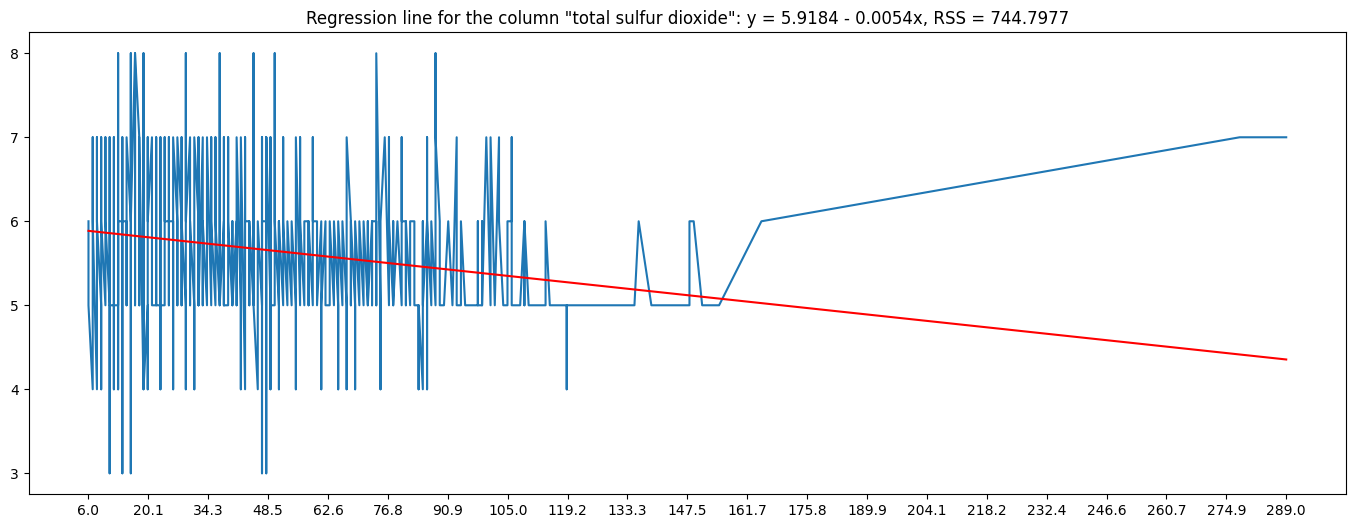

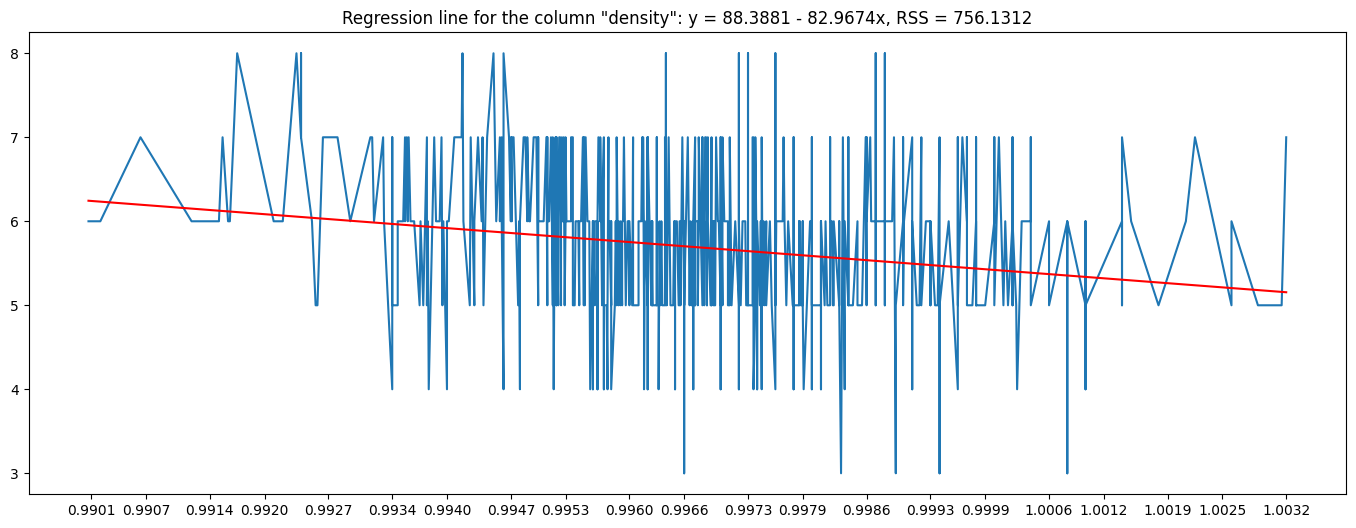

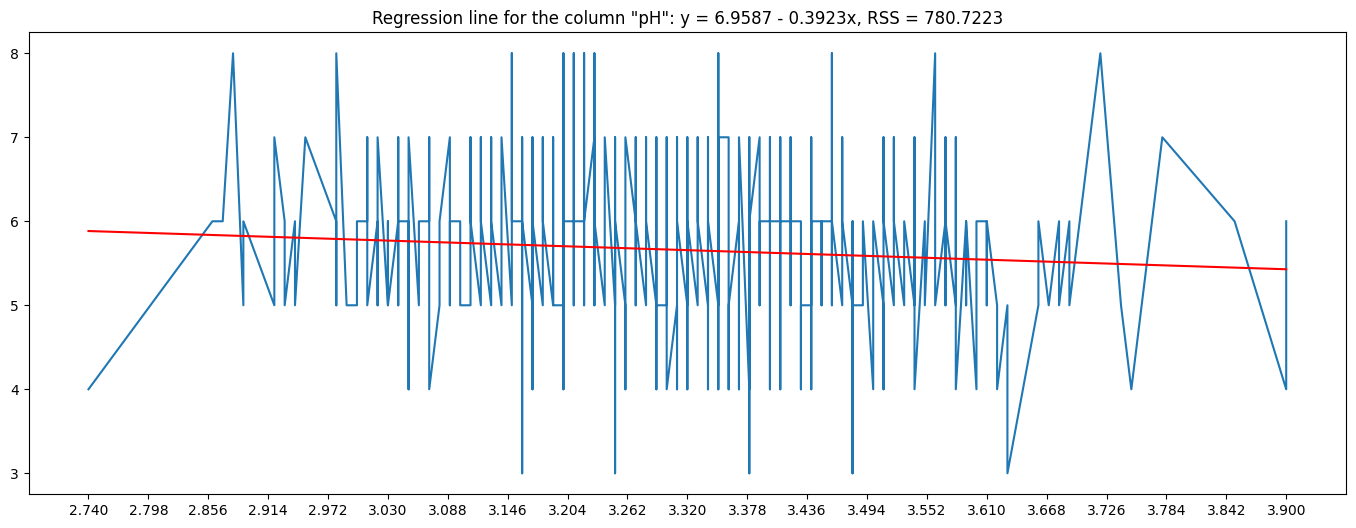

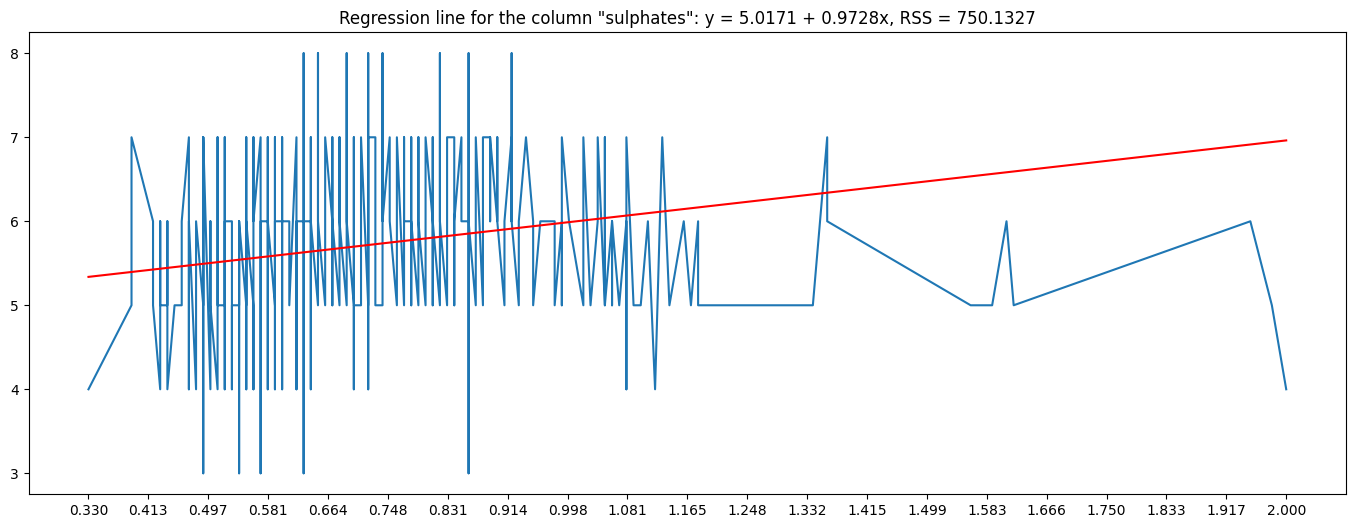

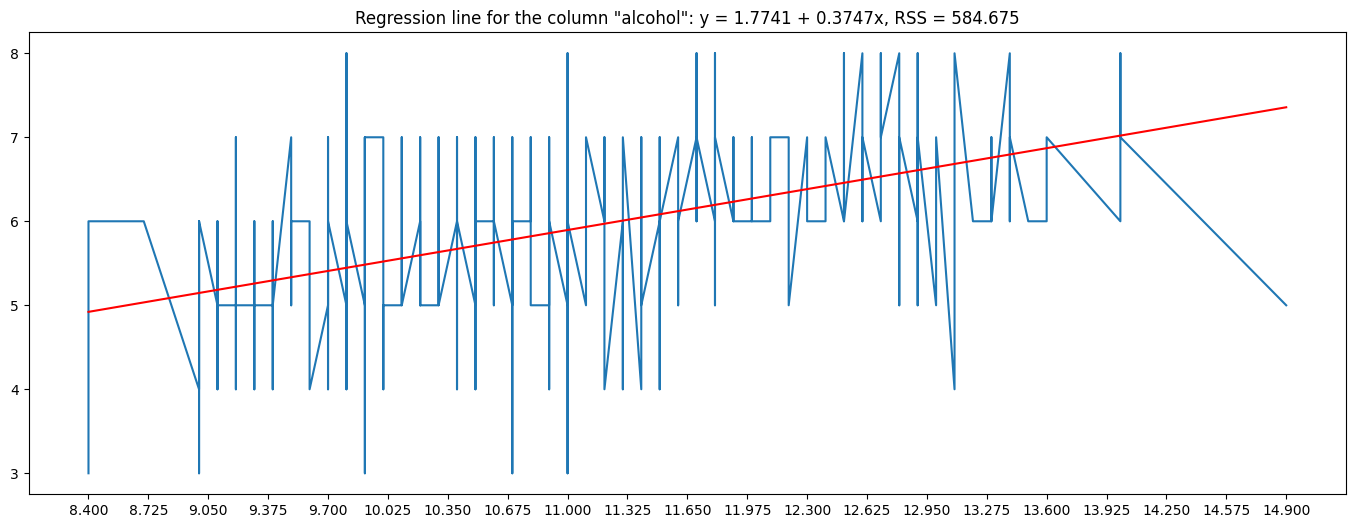

In [11]:
listTupleParameters, listRSSValues = model_build_each_feature(features, labels)
columns = list(data.columns)

for i in range (11):
    plt.figure(figsize = (17,6))
    
    x = [features[j][i] for j in range (len(features))]
    points = [(x[i], labels[i]) for i in range (len(x))]
    points.sort(key = lambda x: x[0])
    
    x = [points[i][0] for i in range (len(points))]
    y = [points[i][1] for i in range (len(points))]
    
    minValue = min(x)
    maxValue = max(x)
    
    plt.plot(x, y)
    plt.plot(x, [listTupleParameters[i][0] + listTupleParameters[i][1] * x[j] for j in range (len(x))], color = 'red')
    plt.xticks([round(minValue + i * (maxValue - minValue) / 20, 4) for i in range (21)])
    
    sign = "+" if listTupleParameters[i][1] > 0 else "-"
    plt.title(f"Regression line for the column \"{columns[i]}\": y = {round(listTupleParameters[i][0], 4)} {sign} {abs(round(listTupleParameters[i][1], 4))}x, RSS = {round(listRSSValues[i], 4)}")

## **6. Thực nghiệm để tìm mô hình tốt nhất có thể**

In [12]:
def model_build_full_features_modify (features: list[list[float]], labels: list[float]):
    """
    This function proposes a function which returns a more effective RSS value compared with two above requirements
    """
    def sin (x):
        PI = 3.1415926535897932384626433
        
        if (x < 0):
            x = x + (1 + int(-x / (2 * PI))) * 2 * PI
        elif (x > 2 * PI):
            x = x - (int(x / (2 * PI))) * 2 * PI
        
        result = 0.0
        factorial = 1
        power = 1
        
        for i in range (21):
            if (i % 2 != 0):
                result += (-1) ** (int(i / 2)) * power / factorial
                
            power = power * x
            factorial = factorial * (i + 1)
            
        return result

    def cos (x):
        PI = 3.1415926535897932384626433
        
        if (x < 0):
            x = x + (1 + int(-x / (2 * PI))) * 2 * PI
        elif (x > 2 * PI):
            x = x - (int(x / (2 * PI))) * 2 * PI
        
        result = 0.0
        factorial = 1
        power = 1
        
        for i in range (21):
            if (i % 2 == 0):
                result += (-1) ** (int(i / 2)) * power / factorial
                
            power = power * x
            factorial = factorial * (i + 1)
            
        return result
    
    if not checkMatrix(features):
        raise Exception ("In the model_build_full_features function, check the feature data matrix again")
    
    if (len(features) != len(labels)):
        raise Exception ("In the model_build_full_features function, the number of labels is different from the number of samples")
    
    X = []
    for i in range (len(features)):
        x = [1] + [1 / (features[i][j] ** 0.53) for j in range (len(features[i])) if j != 2] + [features[i][j] ** 0.05 for j in range (len(features[i]))] + [2.75 ** features[i][j] for j in range (len(features[i]))] + [sin(8741 * features[i][j]) for j in range (len(features[i]))] + [cos(4370 * features[i][j]) for j in range (len(features[i]))]
        for p in range (len(features[i])):
            for q in range (p, len(features[i])):
                x.append((features[i][p] * features[i][q]) ** 1.76)
                
        for p in range (len(features[i])):
            for q in range (p + 1, len(features[i])):
                for r in range (q + 1, len(features[i])):
                    x.append((features[i][p] * features[i][q] * features[i][r]) ** 1.23)
                    
        for p in range (len(features[i])):
            for q in range (p + 1, len(features[i])):
                for r in range (q + 1, len(features[i])):
                    for t in range (r + 1, len(features[i])):
                        x.append((features[i][p] * features[i][q] * features[i][r] * features[i][t]))
                
        X.append(x)
    
    y = transposeMatrix([labels])
    
    parameters = multiplyTwoMatrices(Inverse(multiplyTwoMatrices(transposeMatrix(X), X)), multiplyTwoMatrices(transposeMatrix(X), y))
    
    errorVector = addTwoMatrices(y, multiplyMatrixByScalar(multiplyTwoMatrices(X, parameters), -1))
    RSS = L2_Norm([errorVector[i][0] for i in range (len(errorVector))]) ** 2
    
    return [parameters[i][0] for i in range (len(parameters))], RSS, multiplyTwoMatrices(X, parameters)

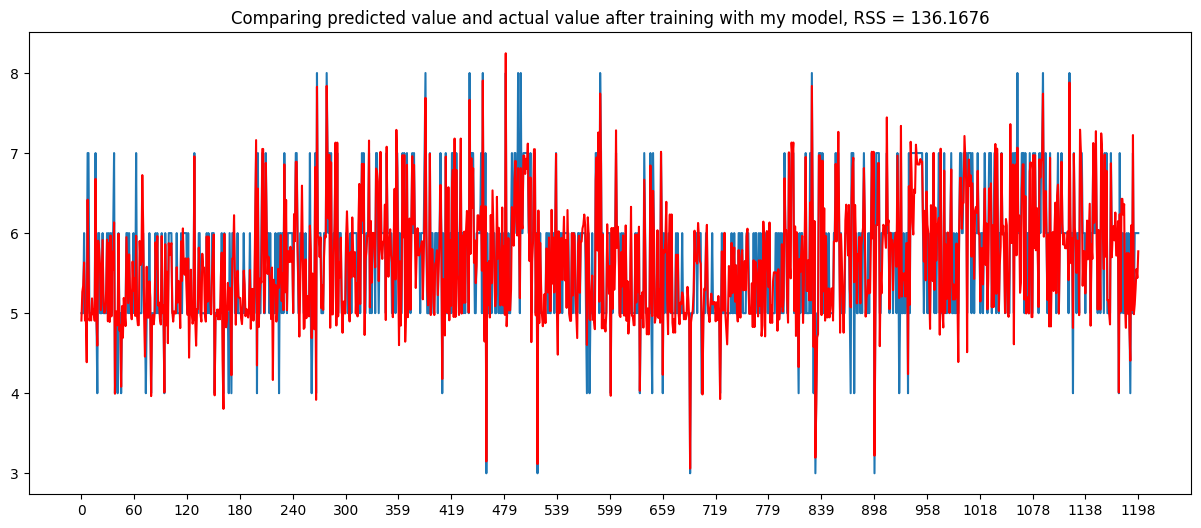

In [13]:
_, RSS, y_predicted = model_build_full_features_modify(features, labels)

plt.figure(figsize = (15,6))

x = [i for i in range (len(features))]

minValue = min(x)
maxValue = max(x)

plt.plot(x, labels)
plt.plot(x, y_predicted, color = 'red')
plt.xticks([minValue + i * (maxValue - minValue) / 20 for i in range (21)])

plt.title(f"Comparing predicted value and actual value after training with my model, RSS = {round(RSS, 4)}");